In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data=pd.read_csv(r'C:\Users\M.dhiinesh\Desktop\sofia\sem2\wine.csv')
data

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [3]:
data.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [4]:
data.tail(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


# Exploring the dataframe

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [6]:
data.shape

(129971, 14)

In [7]:
data.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [8]:
data.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [9]:
data.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

# Cleaning the data

In [10]:
data.duplicated().sum()

0

In [11]:
data.duplicated().any()

False

In [12]:
data.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [13]:
# cleaning the feature 
data['title']=data['title'].apply(lambda x: x.split('(')[-1])

In [14]:
data['title']=data['title'].apply(lambda x: x.split(')')[0])

In [15]:
data['title'].head()

0                   Etna
1                  Douro
2      Willamette Valley
3    Lake Michigan Shore
4      Willamette Valley
Name: title, dtype: object

In [16]:
data['title'].unique()

array(['Etna', 'Douro', 'Willamette Valley', ..., 'Psagot 2014 Merlot',
       'Col Vetoraz Spumanti NV  Prosecco Superiore di Cartizze',
       'Henri de Villamont 2005  Grands-Echezeaux'], dtype=object)

In [17]:
data['title'].value_counts()

WA                                                        5276
Napa Valley                                               4480
Russian River Valley                                      3091
California                                                2629
Paso Robles                                               2350
                                                          ... 
Château Latour-Laguens 2012  Bordeaux Blanc                  1
Château la France 2012  Bordeaux Blanc                       1
Elizabeth Chambers 2012 Lazy River Vineyard Pinot Noir       1
Louis Latour 2006  Chassagne-Montrachet                      1
Henri de Villamont 2005  Grands-Echezeaux                    1
Name: title, Length: 11018, dtype: int64

# Droping the Columns

In [18]:
# droping columns for general requriment and these columns won't be that much useful for our analysis.
data.drop(['Unnamed: 0','region_1','designation',
           'taster_name','taster_twitter_handle'],axis=1, inplace=True)

In [19]:
# droping columns for 60% of null value 
data.drop(['region_2'],axis=1,inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   title        129971 non-null  object 
 6   variety      129970 non-null  object 
 7   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.9+ MB


In [21]:
data.isnull().sum()

country          63
description       0
points            0
price          8996
province         63
title             0
variety           1
winery            0
dtype: int64

In [22]:
data.shape

(129971, 8)

# Feature Engineering

##   Imputation

F:\sofia\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


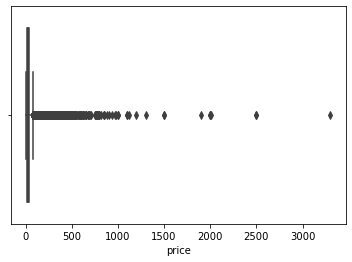

In [23]:
# checking outliers in price to decide for mean or median to fill our missing values 
sns.boxplot(data['price'])
plt.show()

In [24]:
data['price'].fillna(data['price'].median(), inplace = True)

In [25]:
data['province'].mode()[0]

'California'

In [26]:
data['province']=data['province'].fillna(data['province'].mode()[0])

In [27]:
data['variety'].mode()[0]

'Pinot Noir'

In [28]:
data['variety']=data['variety'].fillna(data['variety'].mode()[0])

In [29]:
data.isnull().sum()

country        63
description     0
points          0
price           0
province        0
title           0
variety         0
winery          0
dtype: int64

In [30]:
data['country'].value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

In [31]:
data['country'].mode()[0]

'US'

In [32]:
data['country']=data['country'].fillna(data['country'].mode()[0])

In [33]:
data.isnull().sum()

country        0
description    0
points         0
price          0
province       0
title          0
variety        0
winery         0
dtype: int64

# Handling outliers

In [34]:
# distribution of numerical data
data_num = data.select_dtypes(include = np.number)
data_num.head(2)

,points,price
0,87,25.0
1,87,15.0


F:\sofia\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


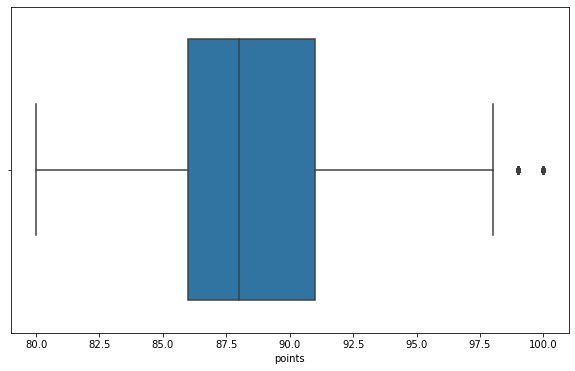

F:\sofia\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


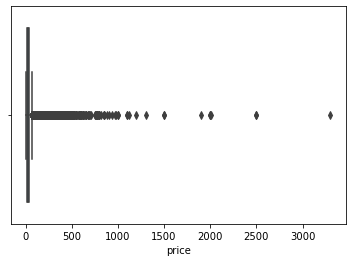

In [35]:
# there is only two numerical feature in the data set let check the outliers by boxplot
# before outliers

plt.figure(figsize = (10, 6))

for i in data_num.columns:
    sns.boxplot(data[i])
    plt.show()

In [36]:
# Outlier Treatment for points

Q1 = data.points.quantile(0.25)
Q3 = data.points.quantile(0.75)

IQR = Q3 - Q1
data = data[(data.points >= Q1 - 1.5*IQR) & (data.points <= Q3 + 1.5*IQR)]

In [37]:
# Outlier Treatment for price 

Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)

IQR = Q3 - Q1
data = data[(data.price >= Q1 - 1.5*IQR) & (data.price <= Q3 + 1.5*IQR)]

F:\sofia\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


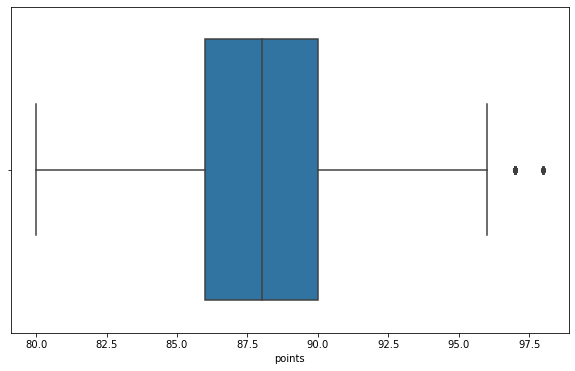

F:\sofia\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


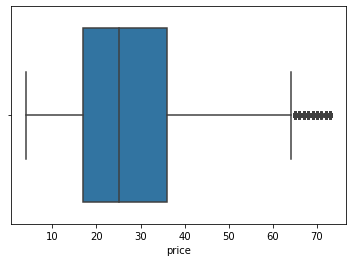

In [38]:
#after outlier
plt.figure(figsize = (10, 6))

for i in data_num.columns:
    sns.boxplot(data[i])
    plt.show()

In [39]:
# after handling missing value and outliers our data shape 
data.shape

(120912, 8)

# Explortory Data Analysis

In [40]:
data.columns

Index(['country', 'description', 'points', 'price', 'province', 'title',
       'variety', 'winery'],
      dtype='object')

<AxesSubplot:xlabel='points', ylabel='price'>

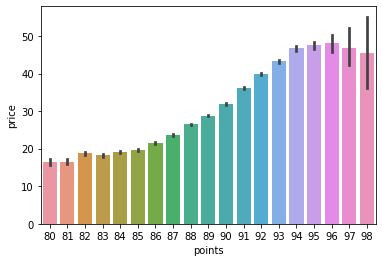

In [41]:
sns.barplot(x = 'points', y = 'price', data = data)

number of country list in data 43


Text(0.5, 1.0, 'distribution of wine reviews by top 20 countries')

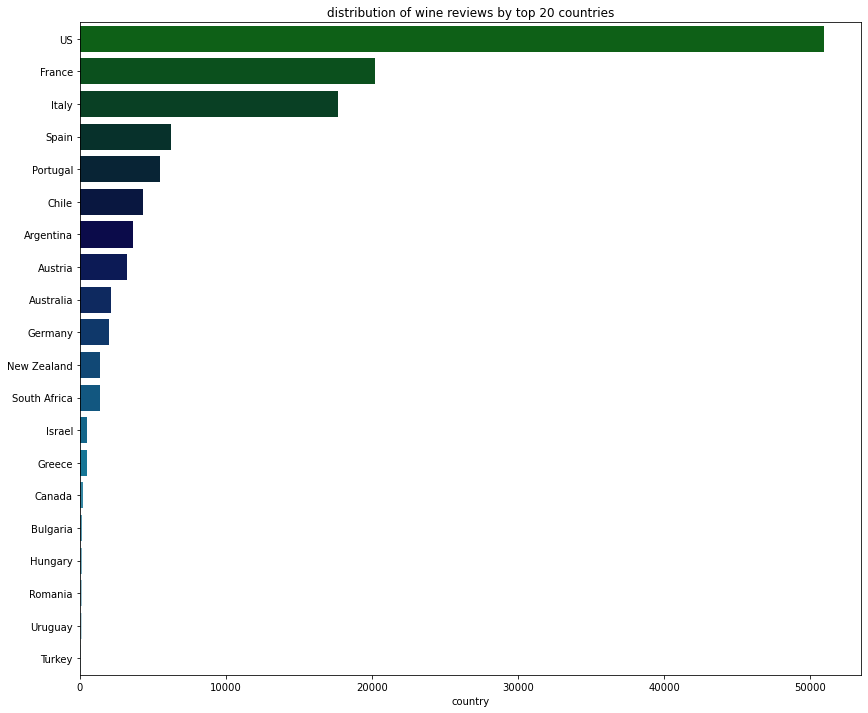

In [42]:
print('number of country list in data',data['country'].nunique())
plt.figure(figsize=(14,12))
cnt=data['country'].value_counts().to_frame()[0:20]
sns.barplot(x=cnt['country'], y=cnt.index, data=cnt, palette='ocean',orient='h')
plt.title('distribution of wine reviews by top 20 countries')

The US is the largest producer of wines.It has 54504 types of wines.It is about 41% of the entire dataset.

In [43]:
data.pivot_table(values='price',index='country').sort_values('price',ascending=False)


,price
country,
England,45.140625
US,31.680865
Canada,31.563025
Italy,29.470968
Israel,29.259794
Switzerland,29.250000
Germany,28.697615
Austria,27.583282
Hungary,27.496183


So,typically in England wines are much costly while in Ukraine we can find the most cheaper wines available.

number of Province 424


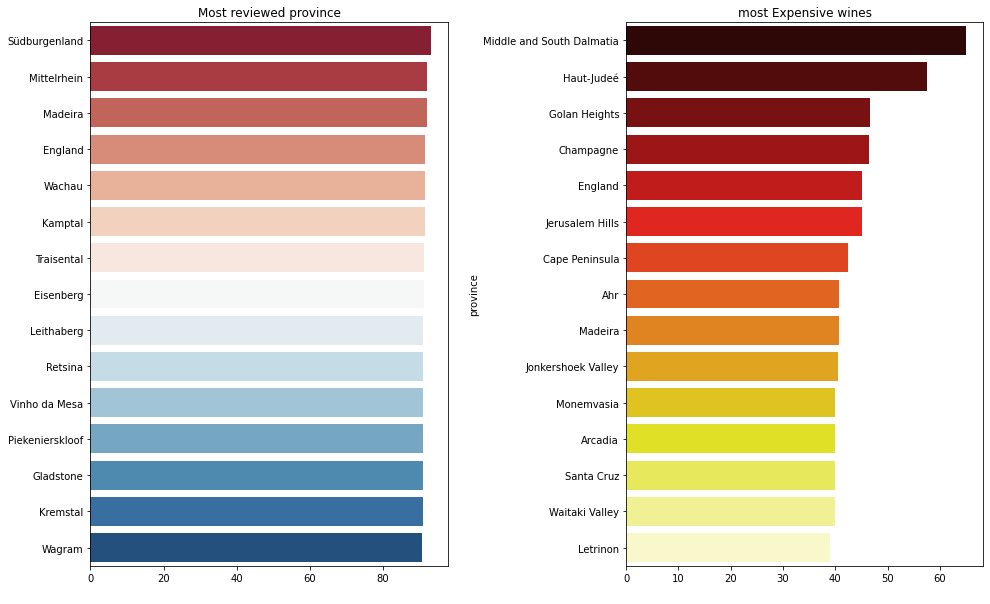

In [44]:
print('number of Province',data['province'].nunique())
f,ax=plt.subplots(1,2,figsize=(16,10))
ax1,ax2=ax.flatten()
cnt=data.groupby(['province'])['points'].mean().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x=cnt['points'], y=cnt.index, data=cnt, palette='RdBu', ax=ax1)
ax1.set_title('Most reviewed province')
ax1.set_ylabel('')
ax1.set_xlabel(' ')

cnt=data.groupby(['province'])['price'].mean().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x=cnt['price'], y=cnt.index, data=cnt,palette='hot', ax=ax2)
ax2.set_title('most Expensive wines')
ax2.set_xlabel(' ')

plt.subplots_adjust(wspace=0.5)

F:\sofia\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


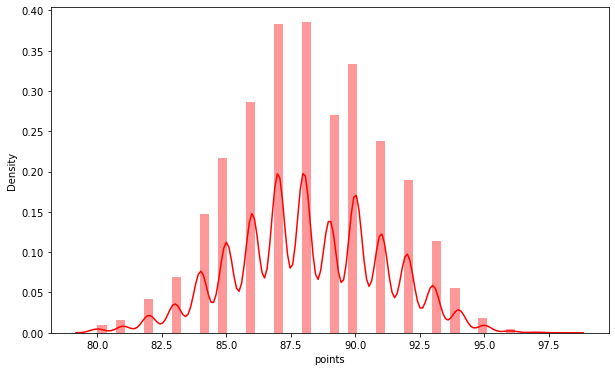

F:\sofia\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


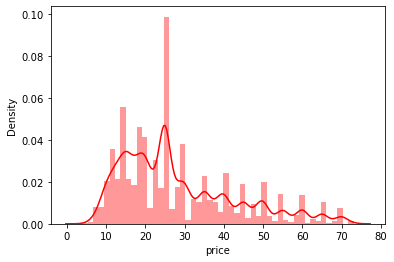

In [47]:
plt.figure(figsize = (10, 6))

for i in data_num.columns:
    sns.distplot(data[i], color = 'red')
    plt.show()

In [48]:
import klib

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='price', ylabel='Density'>

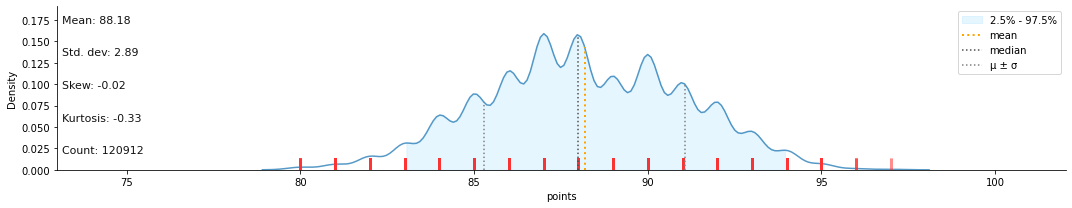

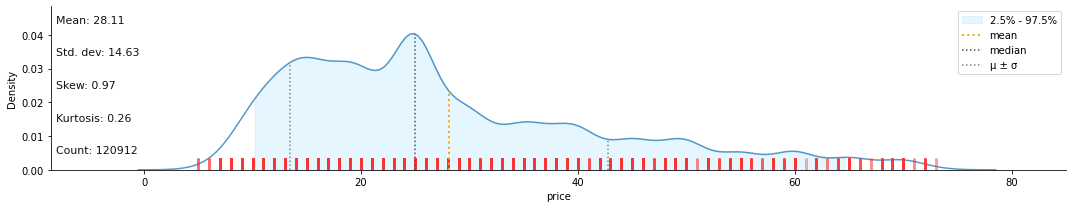

In [49]:
klib.dist_plot(data) # returns a distribution plot for every numeric feature

by the observation we can see our skew is bad and price was not normalize skew

In [50]:
data.head()

,country,description,points,price,province,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,25.0,Sicily & Sardinia,Etna,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Douro,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Pinot Noir,Sweet Cheeks


 # Create quality column from points values to classes of bad, ok, good, and great. Below is a function to return string quality based on the points value.

In [51]:
#Function to return string quality based on points value.
def getQuality(points):
    if(points <= 85):
        return 'bad'
    elif(points<=90 ):
        return 'ok'
    elif(points<=95):
        return 'good'
    elif(points<=100):
        return 'great'
    else:
        return 'If this gets hit, we did something wrong!'

In [52]:
# Next lets apply the function to the points column of the dataframe and add a new column named quality.
data['quality'] = data['points'].apply(getQuality)

<AxesSubplot:xlabel='quality', ylabel='price'>

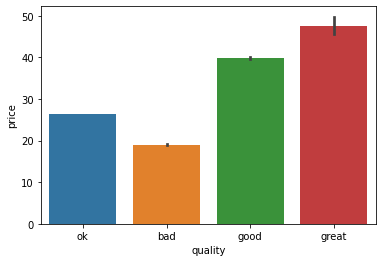

In [53]:
#Lets visualize our new column against the price column like we did above.
sns.barplot(x = 'quality', y = 'price', data = data)

by the observation,

we can see the highest quality has great

# Create priceRange column from price column of 1-30, 31-50, 51-100, Above 100 and 0 for columns with NaN. Below is a function to return string priceRange based on price value.

In [54]:
def getPriceRange(price):
    if(price <= 30):
        return '1-30'
    elif(price<=50):
        return '31-50'
    elif(price<=100): 
        return '51-100'
    elif(math.isnan(price)):
        return '0'
    else:
        return 'Above 100'

In [55]:
#Apply the function to the points column of the dataframe and add a new column named priceRange.
data['priceRange'] = data['price'].apply(getPriceRange)

In [56]:
#Print totals for each priceRange assigned to see how the labels are distributed
data.groupby(data['priceRange']).size()

priceRange
1-30      82446
31-50     27745
51-100    10721
dtype: int64

<AxesSubplot:ylabel='priceRange'>

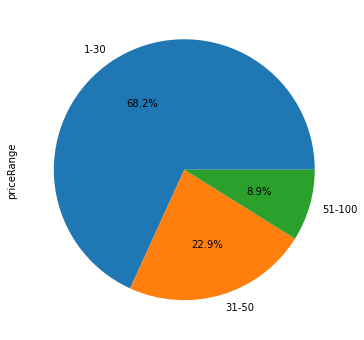

In [57]:
plt.figure(figsize=(7,6))
data['priceRange'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

by the observation,

68.2% highest sales 1-30 price range 

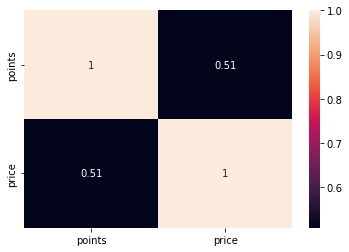

In [58]:
sns.heatmap(data.select_dtypes(['float64' , 'int64']).corr(),annot=True) 
plt.show() 

# Label Encoder

In [59]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
data['variety'] = labelEncoder.fit_transform(data['variety'])

In [60]:
data['country'] = labelEncoder.fit_transform(data['country'])

In [61]:
data['province'] = labelEncoder.fit_transform(data['province'])
data['winery'] = labelEncoder.fit_transform(data['winery'])
data['quality'] = labelEncoder.fit_transform(data['quality'])
data['title'] = labelEncoder.fit_transform(data['title'])

In [62]:
data.head()

,country,description,points,price,province,title,variety,winery,quality,priceRange
0,22,"Aromas include tropical fruit, broom, brimston...",87,25.0,331,5632,686,11382,3,1-30
1,31,"This is ripe and fruity, a wine that is smooth...",87,15.0,108,5529,449,12690,3,1-30
2,40,"Tart and snappy, the flavors of lime flesh and...",87,14.0,268,10199,435,12752,3,1-30
3,40,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,218,6853,477,14094,3,1-30
4,40,"Much like the regular bottling from 2012, this...",87,65.0,268,10199,439,14322,3,51-100


for Label encoding I have selected particular column because comparative other column these featuer has 0.1 to 13.9% of unique values of data that why, we selected particular column for label encoding
and we can't able to do one hot encoding in this feature because it will cause curse of dimensionality.other text feature will be text preprocess. 

# Preprocessing the Data

In [63]:
#expanding the dispay of text sms column
pd.set_option('display.max_colwidth', -1)
#using only description and v2 column
df=data [['description','country']]
df.head()

C:\Windows\Temp\ipykernel_3204\2650317068.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,description,country
0,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",22
1,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",31
2,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",40
3,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",40
4,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",40


In [64]:
df['description'] = df['description'].str.replace('\d+', '')

C:\Windows\Temp\ipykernel_3204\341382306.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df['description'].str.replace('\d+', '')
C:\Windows\Temp\ipykernel_3204\341382306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'] = df['description'].str.replace('\d+', '')


In [65]:
df.head(4)

,description,country
0,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",22
1,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from .",31
2,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",40
3,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",40


## Punctuation Removal:

In [66]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [67]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['clean_description']= df['description'].apply(lambda x:remove_punctuation(x))
df.head()

C:\Windows\Temp\ipykernel_3204\2003348025.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_description']= df['description'].apply(lambda x:remove_punctuation(x))


,description,country,clean_description
0,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",22,Aromas include tropical fruit broom brimstone and dried herb The palate isnt overly expressive offering unripened apple citrus and dried sage alongside brisk acidity
1,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from .",31,This is ripe and fruity a wine that is smooth while still structured Firm tannins are filled out with juicy red berry fruits and freshened with acidity Its already drinkable although it will certainly be better from
2,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",40,Tart and snappy the flavors of lime flesh and rind dominate Some green pineapple pokes through with crisp acidity underscoring the flavors The wine was all stainlesssteel fermented
3,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",40,Pineapple rind lemon pith and orange blossom start off the aromas The palate is a bit more opulent with notes of honeydrizzled guava and mango giving way to a slightly astringent semidry finish
4,"Much like the regular bottling from , this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",40,Much like the regular bottling from this comes across as rather rough and tannic with rustic earthy herbal characteristics Nonetheless if you think of it as a pleasantly unfussy country wine its a good companion to a hearty winter stew


# Steps to clean the text


# Lowering the text: 

In [68]:
df['des_lower']= df['clean_description'].str.lower()

C:\Windows\Temp\ipykernel_3204\3393364385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['des_lower']= df['clean_description'].str.lower()


In [69]:
df.head()

,description,country,clean_description,des_lower
0,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",22,Aromas include tropical fruit broom brimstone and dried herb The palate isnt overly expressive offering unripened apple citrus and dried sage alongside brisk acidity,aromas include tropical fruit broom brimstone and dried herb the palate isnt overly expressive offering unripened apple citrus and dried sage alongside brisk acidity
1,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from .",31,This is ripe and fruity a wine that is smooth while still structured Firm tannins are filled out with juicy red berry fruits and freshened with acidity Its already drinkable although it will certainly be better from,this is ripe and fruity a wine that is smooth while still structured firm tannins are filled out with juicy red berry fruits and freshened with acidity its already drinkable although it will certainly be better from
2,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",40,Tart and snappy the flavors of lime flesh and rind dominate Some green pineapple pokes through with crisp acidity underscoring the flavors The wine was all stainlesssteel fermented,tart and snappy the flavors of lime flesh and rind dominate some green pineapple pokes through with crisp acidity underscoring the flavors the wine was all stainlesssteel fermented
3,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",40,Pineapple rind lemon pith and orange blossom start off the aromas The palate is a bit more opulent with notes of honeydrizzled guava and mango giving way to a slightly astringent semidry finish,pineapple rind lemon pith and orange blossom start off the aromas the palate is a bit more opulent with notes of honeydrizzled guava and mango giving way to a slightly astringent semidry finish
4,"Much like the regular bottling from , this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",40,Much like the regular bottling from this comes across as rather rough and tannic with rustic earthy herbal characteristics Nonetheless if you think of it as a pleasantly unfussy country wine its a good companion to a hearty winter stew,much like the regular bottling from this comes across as rather rough and tannic with rustic earthy herbal characteristics nonetheless if you think of it as a pleasantly unfussy country wine its a good companion to a hearty winter stew


# Tokenization:

In [70]:
from nltk.tokenize import word_tokenize  

In [71]:
#defining function for tokenization
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
df['des_tokenied']= df['des_lower'].apply(lambda x: word_tokenize(x))

C:\Windows\Temp\ipykernel_3204\2949121610.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['des_tokenied']= df['des_lower'].apply(lambda x: word_tokenize(x))


In [72]:
df.head(5)

,description,country,clean_description,des_lower,des_tokenied
0,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",22,Aromas include tropical fruit broom brimstone and dried herb The palate isnt overly expressive offering unripened apple citrus and dried sage alongside brisk acidity,aromas include tropical fruit broom brimstone and dried herb the palate isnt overly expressive offering unripened apple citrus and dried sage alongside brisk acidity,"[aromas, include, tropical, fruit, broom, brimstone, and, dried, herb, the, palate, isnt, overly, expressive, offering, unripened, apple, citrus, and, dried, sage, alongside, brisk, acidity]"
1,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from .",31,This is ripe and fruity a wine that is smooth while still structured Firm tannins are filled out with juicy red berry fruits and freshened with acidity Its already drinkable although it will certainly be better from,this is ripe and fruity a wine that is smooth while still structured firm tannins are filled out with juicy red berry fruits and freshened with acidity its already drinkable although it will certainly be better from,"[this, is, ripe, and, fruity, a, wine, that, is, smooth, while, still, structured, firm, tannins, are, filled, out, with, juicy, red, berry, fruits, and, freshened, with, acidity, its, already, drinkable, although, it, will, certainly, be, better, from]"
2,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",40,Tart and snappy the flavors of lime flesh and rind dominate Some green pineapple pokes through with crisp acidity underscoring the flavors The wine was all stainlesssteel fermented,tart and snappy the flavors of lime flesh and rind dominate some green pineapple pokes through with crisp acidity underscoring the flavors the wine was all stainlesssteel fermented,"[tart, and, snappy, the, flavors, of, lime, flesh, and, rind, dominate, some, green, pineapple, pokes, through, with, crisp, acidity, underscoring, the, flavors, the, wine, was, all, stainlesssteel, fermented]"
3,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",40,Pineapple rind lemon pith and orange blossom start off the aromas The palate is a bit more opulent with notes of honeydrizzled guava and mango giving way to a slightly astringent semidry finish,pineapple rind lemon pith and orange blossom start off the aromas the palate is a bit more opulent with notes of honeydrizzled guava and mango giving way to a slightly astringent semidry finish,"[pineapple, rind, lemon, pith, and, orange, blossom, start, off, the, aromas, the, palate, is, a, bit, more, opulent, with, notes, of, honeydrizzled, guava, and, mango, giving, way, to, a, slightly, astringent, semidry, finish]"
4,"Much like the regular bottling from , this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",40,Much like the regular bottling from this comes across as rather rough and tannic with rustic earthy herbal characteristics Nonetheless if you think of it as a pleasantly unfussy country wine its a good companion to a hearty winter stew,much like the regular bottling from this comes across as rather rough and tannic with rustic earthy herbal characteristics nonetheless if you think of it as a pleasantly unfussy country wine its a good companion to a hearty winter st

# Stopwords removal: 

In [73]:
from nltk.corpus import stopwords 
stop = set(stopwords.words('english')) 
def remove_stopword(word): 
    return word not in words 

In [74]:
#importing nlp library
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [75]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(word):
    output= [i for i in word if i not in stopwords]
    return output

In [76]:
#applying the function
df['des_stopwords']= df['des_tokenied'].apply(lambda x:remove_stopwords(x))

C:\Windows\Temp\ipykernel_3204\2680185547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['des_stopwords']= df['des_tokenied'].apply(lambda x:remove_stopwords(x))


In [77]:
df['des_stopwords'].head()

0    [aromas, include, tropical, fruit, broom, brimstone, dried, herb, palate, isnt, overly, expressive, offering, unripened, apple, citrus, dried, sage, alongside, brisk, acidity]                              
1    [ripe, fruity, wine, smooth, still, structured, firm, tannins, filled, juicy, red, berry, fruits, freshened, acidity, already, drinkable, although, certainly, better]                                       
2    [tart, snappy, flavors, lime, flesh, rind, dominate, green, pineapple, pokes, crisp, acidity, underscoring, flavors, wine, stainlesssteel, fermented]                                                        
3    [pineapple, rind, lemon, pith, orange, blossom, start, aromas, palate, bit, opulent, notes, honeydrizzled, guava, mango, giving, way, slightly, astringent, semidry, finish]                                 
4    [much, like, regular, bottling, comes, across, rather, rough, tannic, rustic, earthy, herbal, characteristics, nonetheless, think, pleasantly, unfussy,

# Lemmatization:

In [78]:
from nltk.stem import WordNetLemmatizer

In [79]:
wnl = WordNetLemmatizer()
df['des_lemmatized'] = df['des_stopwords'].apply(lambda x: [wnl.lemmatize(word) for word in x])
df.head()

C:\Windows\Temp\ipykernel_3204\4109398343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['des_lemmatized'] = df['des_stopwords'].apply(lambda x: [wnl.lemmatize(word) for word in x])


,description,country,clean_description,des_lower,des_tokenied,des_stopwords,des_lemmatized
0,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",22,Aromas include tropical fruit broom brimstone and dried herb The palate isnt overly expressive offering unripened apple citrus and dried sage alongside brisk acidity,aromas include tropical fruit broom brimstone and dried herb the palate isnt overly expressive offering unripened apple citrus and dried sage alongside brisk acidity,"[aromas, include, tropical, fruit, broom, brimstone, and, dried, herb, the, palate, isnt, overly, expressive, offering, unripened, apple, citrus, and, dried, sage, alongside, brisk, acidity]","[aromas, include, tropical, fruit, broom, brimstone, dried, herb, palate, isnt, overly, expressive, offering, unripened, apple, citrus, dried, sage, alongside, brisk, acidity]","[aroma, include, tropical, fruit, broom, brimstone, dried, herb, palate, isnt, overly, expressive, offering, unripened, apple, citrus, dried, sage, alongside, brisk, acidity]"
1,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from .",31,This is ripe and fruity a wine that is smooth while still structured Firm tannins are filled out with juicy red berry fruits and freshened with acidity Its already drinkable although it will certainly be better from,this is ripe and fruity a wine that is smooth while still structured firm tannins are filled out with juicy red berry fruits and freshened with acidity its already drinkable although it will certainly be better from,"[this, is, ripe, and, fruity, a, wine, that, is, smooth, while, still, structured, firm, tannins, are, filled, out, with, juicy, red, berry, fruits, and, freshened, with, acidity, its, already, drinkable, although, it, will, certainly, be, better, from]","[ripe, fruity, wine, smooth, still, structured, firm, tannins, filled, juicy, red, berry, fruits, freshened, acidity, already, drinkable, although, certainly, better]","[ripe, fruity, wine, smooth, still, structured, firm, tannin, filled, juicy, red, berry, fruit, freshened, acidity, already, drinkable, although, certainly, better]"
2,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",40,Tart and snappy the flavors of lime flesh and rind dominate Some green pineapple pokes through with crisp acidity underscoring the flavors The wine was all stainlesssteel fermented,tart and snappy the flavors of lime flesh and rind dominate some green pineapple pokes through with crisp acidity underscoring the flavors the wine was all stainlesssteel fermented,"[tart, and, snappy, the, flavors, of, lime, flesh, and, rind, dominate, some, green, pineapple, pokes, through, with, crisp, acidity, underscoring, the, flavors, the, wine, was, all, stainlesssteel, fermented]","[tart, snappy, flavors, lime, flesh, rind, dominate, green, pineapple, pokes, crisp, acidity, underscoring, flavors, wine, stainlesssteel, fermented]","[tart, snappy, flavor, lime, flesh, rind, dominate, green, pineapple, poke, crisp, acidity, underscoring, flavor, wine, stainlesssteel, fermented]"
3,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",40,Pineapple rind lemon pith and orange blossom start off the aromas The palate is a bit more opulent with notes of honeydrizzled guava and mango giving way to a slightly astringent semidry finish,pineapple rind lemon pith and orange blossom start off the aromas the palate is a bit more opulent with notes of honeydrizzle

In [80]:
df.columns

Index(['description', 'country', 'clean_description', 'des_lower',
       'des_tokenied', 'des_stopwords', 'des_lemmatized'],
      dtype='object')

In [81]:
#dropping columns for the reducation of feature
df.drop(['description', 'country', 'clean_description', 'des_lower',
       'des_tokenied', 'des_stopwords',],axis=1,inplace=True)

C:\Windows\Temp\ipykernel_3204\3045089038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['description', 'country', 'clean_description', 'des_lower',


In [82]:
df.head(10)

,des_lemmatized
0,"[aroma, include, tropical, fruit, broom, brimstone, dried, herb, palate, isnt, overly, expressive, offering, unripened, apple, citrus, dried, sage, alongside, brisk, acidity]"
1,"[ripe, fruity, wine, smooth, still, structured, firm, tannin, filled, juicy, red, berry, fruit, freshened, acidity, already, drinkable, although, certainly, better]"
2,"[tart, snappy, flavor, lime, flesh, rind, dominate, green, pineapple, poke, crisp, acidity, underscoring, flavor, wine, stainlesssteel, fermented]"
3,"[pineapple, rind, lemon, pith, orange, blossom, start, aroma, palate, bit, opulent, note, honeydrizzled, guava, mango, giving, way, slightly, astringent, semidry, finish]"
4,"[much, like, regular, bottling, come, across, rather, rough, tannic, rustic, earthy, herbal, characteristic, nonetheless, think, pleasantly, unfussy, country, wine, good, companion, hearty, winter, stew]"
5,"[blackberry, raspberry, aroma, show, typical, navarran, whiff, green, herb, case, horseradish, mouth, fairly, full, bodied, tomatoey, acidity, spicy, herbal, flavor, complement, dark, plum, fruit, finish, fresh, grabby]"
6,"[here, bright, informal, red, open, aroma, candied, berry, white, pepper, savory, herb, carry, palate, balanced, fresh, acidity, soft, tannin]"
7,"[dry, restrained, wine, offer, spice, profusion, balanced, acidity, firm, texture, much, food]"
8,"[savory, dried, thyme, note, accent, sunnier, flavor, preserved, peach, brisk, offdry, wine, fruity, fresh, elegant, sprightly, footprint]"
9,"[great, depth, flavor, fresh, apple, pear, fruit, touch, spice, dry, balanced, acidity, crisp, texture, drink]"


In [83]:
data=pd.concat([data,df],join='outer',axis=1)


In [84]:
data.head()

,country,description,points,price,province,title,variety,winery,quality,priceRange,des_lemmatized
0,22,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",87,25.0,331,5632,686,11382,3,1-30,"[aroma, include, tropical, fruit, broom, brimstone, dried, herb, palate, isnt, overly, expressive, offering, unripened, apple, citrus, dried, sage, alongside, brisk, acidity]"
1,31,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",87,15.0,108,5529,449,12690,3,1-30,"[ripe, fruity, wine, smooth, still, structured, firm, tannin, filled, juicy, red, berry, fruit, freshened, acidity, already, drinkable, although, certainly, better]"
2,40,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",87,14.0,268,10199,435,12752,3,1-30,"[tart, snappy, flavor, lime, flesh, rind, dominate, green, pineapple, poke, crisp, acidity, underscoring, flavor, wine, stainlesssteel, fermented]"
3,40,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",87,13.0,218,6853,477,14094,3,1-30,"[pineapple, rind, lemon, pith, orange, blossom, start, aroma, palate, bit, opulent, note, honeydrizzled, guava, mango, giving, way, slightly, astringent, semidry, finish]"
4,40,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",87,65.0,268,10199,439,14322,3,51-100,"[much, like, regular, bottling, come, across, rather, rough, tannic, rustic, earthy, herbal, characteristic, nonetheless, think, pleasantly, unfussy, country, wine, good, companion, hearty, winter, stew]"


In [85]:
#dropping the column for vectorize
data.drop(['description'],axis=1,inplace=True)

In [86]:
data.head(5)

,country,points,price,province,title,variety,winery,quality,priceRange,des_lemmatized
0,22,87,25.0,331,5632,686,11382,3,1-30,"[aroma, include, tropical, fruit, broom, brimstone, dried, herb, palate, isnt, overly, expressive, offering, unripened, apple, citrus, dried, sage, alongside, brisk, acidity]"
1,31,87,15.0,108,5529,449,12690,3,1-30,"[ripe, fruity, wine, smooth, still, structured, firm, tannin, filled, juicy, red, berry, fruit, freshened, acidity, already, drinkable, although, certainly, better]"
2,40,87,14.0,268,10199,435,12752,3,1-30,"[tart, snappy, flavor, lime, flesh, rind, dominate, green, pineapple, poke, crisp, acidity, underscoring, flavor, wine, stainlesssteel, fermented]"
3,40,87,13.0,218,6853,477,14094,3,1-30,"[pineapple, rind, lemon, pith, orange, blossom, start, aroma, palate, bit, opulent, note, honeydrizzled, guava, mango, giving, way, slightly, astringent, semidry, finish]"
4,40,87,65.0,268,10199,439,14322,3,51-100,"[much, like, regular, bottling, come, across, rather, rough, tannic, rustic, earthy, herbal, characteristic, nonetheless, think, pleasantly, unfussy, country, wine, good, companion, hearty, winter, stew]"


In [87]:
data.shape

(120912, 10)

# Word count

In [88]:
from collections import Counter

description_str_all = ' '.join(data['des_lemmatized'].str.join(' ').tolist())
counter = Counter(description_str_all.split())
counter = dict(sorted(counter.items(), key=lambda item: item[1], reverse=True)[:15])
counter

{'wine': 75616,
 'flavor': 64774,
 'fruit': 54152,
 'aroma': 38296,
 'finish': 36164,
 'palate': 35567,
 'acidity': 32823,
 'tannin': 28899,
 'cherry': 28752,
 'drink': 27326,
 'ripe': 24763,
 'note': 23334,
 'black': 22318,
 'spice': 19860,
 'red': 17658}

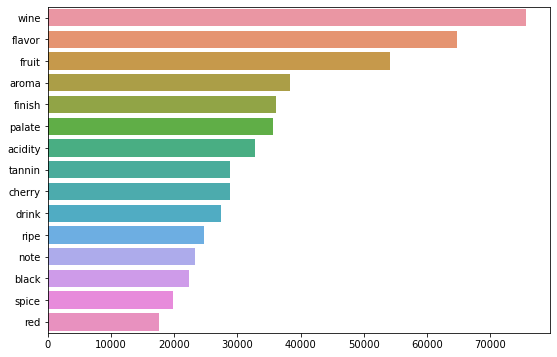

In [89]:
plt.figure(figsize=(9, 6))
sns.barplot(y=list(counter.keys()), x=list(counter.values()));

In [90]:
# to avoid the type error removed the [] and , in count vectorization
data['des_lemmatized'] = data['des_lemmatized'].apply(lambda x: " ".join(x) )

In [91]:
#this help us from value error
data['des_lemmatized'] = data['des_lemmatized'].astype(str)

In [92]:
data.head()

,country,points,price,province,title,variety,winery,quality,priceRange,des_lemmatized
0,22,87,25.0,331,5632,686,11382,3,1-30,aroma include tropical fruit broom brimstone dried herb palate isnt overly expressive offering unripened apple citrus dried sage alongside brisk acidity
1,31,87,15.0,108,5529,449,12690,3,1-30,ripe fruity wine smooth still structured firm tannin filled juicy red berry fruit freshened acidity already drinkable although certainly better
2,40,87,14.0,268,10199,435,12752,3,1-30,tart snappy flavor lime flesh rind dominate green pineapple poke crisp acidity underscoring flavor wine stainlesssteel fermented
3,40,87,13.0,218,6853,477,14094,3,1-30,pineapple rind lemon pith orange blossom start aroma palate bit opulent note honeydrizzled guava mango giving way slightly astringent semidry finish
4,40,87,65.0,268,10199,439,14322,3,51-100,much like regular bottling come across rather rough tannic rustic earthy herbal characteristic nonetheless think pleasantly unfussy country wine good companion hearty winter stew


# Splitting the data

In [93]:
x=data.drop(['quality'],axis=1)
target=data['quality']

In [94]:
x

,country,points,price,province,title,variety,winery,priceRange,des_lemmatized
0,22,87,25.0,331,5632,686,11382,1-30,aroma include tropical fruit broom brimstone dried herb palate isnt overly expressive offering unripened apple citrus dried sage alongside brisk acidity
1,31,87,15.0,108,5529,449,12690,1-30,ripe fruity wine smooth still structured firm tannin filled juicy red berry fruit freshened acidity already drinkable although certainly better
2,40,87,14.0,268,10199,435,12752,1-30,tart snappy flavor lime flesh rind dominate green pineapple poke crisp acidity underscoring flavor wine stainlesssteel fermented
3,40,87,13.0,218,6853,477,14094,1-30,pineapple rind lemon pith orange blossom start aroma palate bit opulent note honeydrizzled guava mango giving way slightly astringent semidry finish
4,40,87,65.0,268,10199,439,14322,51-100,much like regular bottling come across rather rough tannic rustic earthy herbal characteristic nonetheless think pleasantly unfussy country wine good companion hearty winter stew
...,...,...,...,...,...,...,...,...,...
129965,15,90,28.0,11,167,435,5984,1-30,rich beautiful dry wine also offer considerable freshness acidity cut easily ripe white fruit pear red apple allowing room spice provides contrasting aftertaste
129966,17,90,28.0,232,7713,477,6518,1-30,note honeysuckle cantaloupe sweeten deliciously featherlight spätlese intensely juicy quenching palate stream tart tangerine grapefruit acidity yet wrap kiss honey peach
129968,15,90,30.0,11,167,208,5818,1-30,welldrained gravel soil give wine crisp dry character ripe fruity although spice subdued favor serious structure wine age couple year drink
129969,15,90,32.0,11,167,435,5913,31-50,dry style pinot gris crisp acidity also weight solid powerful core spice baked apple flavor structure still developing wine need age drink


In [95]:
target

0         3
1         3
2         3
3         3
4         3
         ..
129965    3
129966    3
129968    3
129969    3
129970    3
Name: quality, Length: 120912, dtype: int32

In [96]:
x_train, x_test, target_train, target_test = train_test_split(x, target, test_size=0.3, random_state=2000)


In [97]:
x_train.shape, x_test.shape

((84638, 9), (36274, 9))

In [98]:
target_train.shape, target_test.shape

((84638,), (36274,))

# Model Building & Evaluation

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer, TfidfTransformer

In [100]:
# initialize transformers
count_vect = CountVectorizer()
tfidf_transformer = TfidfTransformer()


In [101]:
# fit and transform train data
X_train_counts = count_vect.fit_transform(x_train['des_lemmatized'])
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [102]:
X_train_tfidf.shape

(84638, 31946)

In [103]:
# transform test data
X_test_counts = count_vect.transform(x_test['des_lemmatized'])

X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [104]:
X_test_tfidf.shape

(36274, 31946)

In [105]:
tfidf_vect = TfidfVectorizer()

X_train_tfidf = tfidf_vect.fit_transform(x_train['des_lemmatized'])
X_test_tfidf = tfidf_vect.transform(x_test['des_lemmatized'])

In [106]:
X_train_tfidf.shape

(84638, 31946)

In [107]:
X_test_tfidf.shape

(36274, 31946)

# Train the model 

# LogisticRegression algorithm for classification

In [108]:
lr = LogisticRegression(multi_class='ovr',solver='lbfgs')
model = lr.fit(X_train_tfidf,target_train)

F:\sofia\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [109]:
y_pred = lr.predict(X_test_tfidf)

In [110]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_test, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[ 3201    14     0  3273]
 [   22  4097     0  3896]
 [    0    73     0     7]
 [  846  1515     0 19330]]


In [111]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(target_test, y_pred))

Accuracy :  0.7340795059822462


In [112]:
from sklearn.metrics import classification_report
print(classification_report(target_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.49      0.61      6488
           1       0.72      0.51      0.60      8015
           2       0.00      0.00      0.00        80
           3       0.73      0.89      0.80     21691

    accuracy                           0.73     36274
   macro avg       0.56      0.47      0.50     36274
weighted avg       0.74      0.73      0.72     36274



F:\sofia\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\sofia\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\sofia\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random forest Algorithum

# split the data

In [113]:
X=data.drop(['priceRange'],axis=1)
target_Y=data['priceRange']

In [114]:
X

,country,points,price,province,title,variety,winery,quality,des_lemmatized
0,22,87,25.0,331,5632,686,11382,3,aroma include tropical fruit broom brimstone dried herb palate isnt overly expressive offering unripened apple citrus dried sage alongside brisk acidity
1,31,87,15.0,108,5529,449,12690,3,ripe fruity wine smooth still structured firm tannin filled juicy red berry fruit freshened acidity already drinkable although certainly better
2,40,87,14.0,268,10199,435,12752,3,tart snappy flavor lime flesh rind dominate green pineapple poke crisp acidity underscoring flavor wine stainlesssteel fermented
3,40,87,13.0,218,6853,477,14094,3,pineapple rind lemon pith orange blossom start aroma palate bit opulent note honeydrizzled guava mango giving way slightly astringent semidry finish
4,40,87,65.0,268,10199,439,14322,3,much like regular bottling come across rather rough tannic rustic earthy herbal characteristic nonetheless think pleasantly unfussy country wine good companion hearty winter stew
...,...,...,...,...,...,...,...,...,...
129965,15,90,28.0,11,167,435,5984,3,rich beautiful dry wine also offer considerable freshness acidity cut easily ripe white fruit pear red apple allowing room spice provides contrasting aftertaste
129966,17,90,28.0,232,7713,477,6518,3,note honeysuckle cantaloupe sweeten deliciously featherlight spätlese intensely juicy quenching palate stream tart tangerine grapefruit acidity yet wrap kiss honey peach
129968,15,90,30.0,11,167,208,5818,3,welldrained gravel soil give wine crisp dry character ripe fruity although spice subdued favor serious structure wine age couple year drink
129969,15,90,32.0,11,167,435,5913,3,dry style pinot gris crisp acidity also weight solid powerful core spice baked apple flavor structure still developing wine need age drink


In [115]:
target_Y

0         1-30  
1         1-30  
2         1-30  
3         1-30  
4         51-100
           ...  
129965    1-30  
129966    1-30  
129968    1-30  
129969    31-50 
129970    1-30  
Name: priceRange, Length: 120912, dtype: object

In [116]:
X_train, X_test, Target_train, Target_test = train_test_split(X, target_Y, test_size=0.3, random_state=2000)


In [117]:
X_train.shape, X_test.shape

((84638, 9), (36274, 9))

In [118]:
Target_train.shape,Target_test.shape

((84638,), (36274,))

# vectorization

In [119]:
# initialize transformers
count_vect = CountVectorizer()
tfidf_transformer = TfidfTransformer()


In [120]:
# fit and transform train data
X_train_counts = count_vect.fit_transform(X_train['des_lemmatized'])
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [121]:
X_train_tfidf.shape

(84638, 31946)

In [122]:
# transform test data
X_test_counts = count_vect.transform(X_test['des_lemmatized'])

X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [123]:
X_test_tfidf.shape

(36274, 31946)

In [124]:
tfidf_vect = TfidfVectorizer()

X_train_tfidf = tfidf_vect.fit_transform(X_train['des_lemmatized'])
X_test_tfidf = tfidf_vect.transform(X_test['des_lemmatized'])

In [125]:
X_train_tfidf.shape

(84638, 31946)

In [126]:
X_test_tfidf.shape

(36274, 31946)

In [127]:
rfc = RandomForestClassifier(n_estimators=200, random_state = 2020,max_depth=6 )

In [128]:
model = rfc.fit(X_train_tfidf,Target_train)

In [129]:
y_pred_rfc = rfc.predict(X_test_tfidf)
y_pred_rfc

array(['1-30', '1-30', '1-30', ..., '1-30', '1-30', '1-30'], dtype=object)

In [130]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(Target_test, y_pred_rfc))

Accuracy :  0.6804046975795336
